# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
nb_classes = len(np.unique(y_train))

# Imagine a stack of 39209 images. All these images are RGB 
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))
print("Shape of X_train image data: {}".format(X_train[0].shape))
print("Number of classes: {}".format(nb_classes))

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print("Training Set:   {} samples".format(len(X_train)))
print("Test Set: {} samples".format(len(X_test)))

Shape of X_train: (39209, 32, 32, 3)
Shape of y_train: (39209,)
Shape of X_test: (12630, 32, 32, 3)
Shape of y_test: (12630,)
Shape of X_train image data: (32, 32, 3)
Number of classes: 43
Training Set:   39209 samples
Test Set: 12630 samples


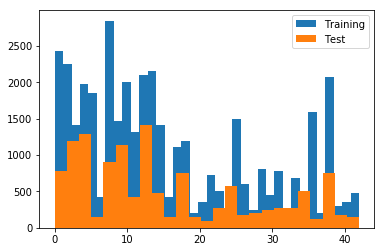

In [7]:
from matplotlib import pyplot

pyplot.hist(y_train, bins='auto', alpha=1, label='Training')
pyplot.hist(y_test, bins='auto', alpha=1, label='Test')
pyplot.legend(loc='upper right')
pyplot.show()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Showing image at the index: 30890, class for image: 28


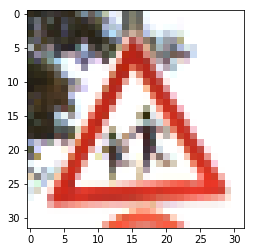

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint

# Visualizations will be shown in the notebook.
%matplotlib inline

# Show a random image
random_index = randint(0,n_train)
image = X_train[random_index]
print("Showing image at the index: {}, class for image: {}".format(random_index, str(y_train[random_index])))
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
"""
image_sizes = train['sizes']
for i in range(10):
    print(image_sizes[i])
"""    
# Let's not do any preprocessing for now. In future, think about:
# 1. Rotating the image
# 2. Grayscaling the image
# 3. Or Grayscaling and using those images in addition to the RGB images (maybe convert to grayscale and stack)
# 4. Normalization
# 5. May also think about scaling the images as per the sizes and x,y co-ordinates (although, not sure if this is a good idea)

"\nimage_sizes = train['sizes']\nfor i in range(10):\n    print(image_sizes[i])\n"

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
The first steps in pre-processing the data was to get a feel of what data looks like in terms of its properties and also visually.
In the beginning, I printed out how many training and testing samples will there be and determined, how much of the training data will be set aside for validation.

For preprocessing, I considered several options such as:
Several options were considered for preprocessing the data. Including:
1. Rotating the image
2. Gray-scaling the image
3. Or gray-scaling and using those images in addition to the RGB images (maybe convert to grayscale and stack)
4. Normalization
5. Scaling the images as per the sizes and x, y co-ordinates

I ended up implementing a couple of these options and tested if there's any performance gain.

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import sklearn

# We will reserve 20% data for validation
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

print("Lengths:")
print("X_train: {}, X_validation: {}, y_train: {}, y_validation: {}"
      .format(len(X_train),len(X_validation), len(y_train), len(y_validation)))

assert((len(X_train)+ len(X_validation)) == n_train)
assert((len(y_train)+ len(y_validation)) == (n_train))

Lengths:
X_train: 31367, X_validation: 7842, y_train: 31367, y_validation: 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
- Used 20% of the training data for validation, as suggested in the class video, without any pre-processing. This gave 94.1% accuracy in the first run.
- Keeping in mind that the images are color images and to remove the dependency on the color of the sign, the same training images were converted to grayscale and used for training. Keeping the 80% training and 20% validation proportion same as before.

In [6]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

In [7]:
import cv2

def append_grayscaled_images(X_train, y_train):
    assert(len(X_train) == len(y_train))
    print("Original shape of training dataset: features = {}, labels = {}".format(X_train.shape, y_train.shape))
    images = []
    
    for i in range(len(X_train)):
        img = X_train[i]
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = np.dstack((img, img, img)) 
        images.append(img)
    
    # display a random image and make sure its grayscaled
    # plt.imshow(images[random_index])
    
    images = np.array(images)
    print("Shape of grayscaled images list: {}".format(images.shape))
    
    #print("Normalizing grayscaled images...")
    #images = normalize_grayscale(images)
    
    X_train = np.append(X_train,images, axis=0)
    y_train = np.append(y_train,y_train)
    
    print("New shape of training dataset: features = {}, labels = {}".format(X_train.shape, y_train.shape))

In [8]:
# Here we will create the grayscaled images and append to the original images
#append_grayscaled_images(X_train, y_train)

# update the number of training images
n_train = len(X_train)

print("New length of training dataset: features = {}, labels = {}".format(n_train, len(y_train)))

New length of training dataset: features = 31367, labels = 31367


For the following image, class for image is: 4


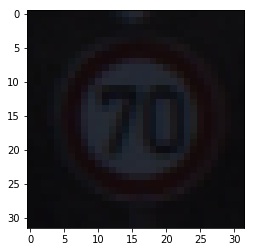

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# shuffle images
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Check for sanity, if the image and the label match
random_index = randint(0,n_train)
image = X_train[random_index]
print("For the following image, class for image is: {}".format(str(y_train[random_index])))
plt.imshow(image)

In [10]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 50
BATCH_SIZE = 128

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1
keep_prob = 0.75

In [11]:
# Store layers weight & bias dimensions
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 6], name='wc1', mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16], name='wc2', mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.random_normal([2, 2, 16, 32], name='wc3', mean = mu, stddev = sigma)),
    'wc4': tf.Variable(tf.random_normal([2, 2, 32, 64], name='wc4', mean = mu, stddev = sigma)),
    'fc1': tf.Variable(tf.random_normal([5*5*64, 120], name='fc1', mean = mu, stddev = sigma)),
    'fc2': tf.Variable(tf.random_normal([120, 80], name='fc2', mean = mu, stddev = sigma)),
    'fc3': tf.Variable(tf.random_normal([80, 43],  name='fc3', mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.random_normal([6]), name='bc1'),
    'bc2': tf.Variable(tf.random_normal([16]), name='bc2'),
    'bc3': tf.Variable(tf.random_normal([32]), name='bc3'),
    'bc4': tf.Variable(tf.random_normal([64]), name='bc4'),
    'fc1': tf.Variable(tf.random_normal([120]), name='fc1'),
    'fc2': tf.Variable(tf.random_normal([80]), name='fc2'),
    'fc3': tf.Variable(tf.random_normal([43]), name='fc3')}

In [12]:
def conv2d(x, W, b, strides=1, padding = 'SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding= padding)
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [13]:
def LeNet(x):    
    
    print("Shape of x:")
    print(x.get_shape())
    
    # Convolutional. Input = 32x32x3. Output = 28x28x6.
    strides = 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides, 'VALID')
    print("Shape after conv1:")
    print(conv1.get_shape)

    # Activation.
    act1 = tf.nn.relu(conv1)
    # print("Shape after act1:")
    # print(act1.get_shape)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    maxpool = maxpool2d(act1, k=2)

    # Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2 = conv2d(maxpool, weights['wc2'], biases['bc2'], strides, 'VALID')
    
    # Activation.
    act2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    maxpool = maxpool2d(act2, k=2)
    
    # NEW: Added a droput layer here
    dropout = tf.nn.dropout(maxpool, keep_prob)
    
    # NEW: Added one more convolution layer here
    # Convolutional. Input = 5x5x16. Output = 5x5x32.
    conv3 = conv2d(dropout, weights['wc3'], biases['bc3'], strides, 'SAME')
    
    # Convolution. Input = 5x5x32. Output = 5x5x64.
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'], strides, 'SAME')
    
    # Activation.
    act3 = tf.nn.relu(conv4)
    
    # NEW: Added a droput layer here
    dropout = tf.nn.dropout(act3, keep_prob)

    # Flatten. Input = 5x5x64. Output = 1600.
    flattened = tf.reshape(dropout, [-1, weights['fc1'].get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1 = tf.add(tf.matmul(flattened, weights['fc1']), biases['fc1'])
    
    # Activation.
    act3 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 80.
    fc2 = tf.add(tf.matmul(act3, weights['fc2']), biases['fc2'])
    
    # Activation.
    act4 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 80. Output = 43.
    logits = tf.add(tf.matmul(act4, weights['fc3']), biases['fc3'])
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The model architecture is as follows:
- There are 4 convolutional layer: conv1, conv2, conv3, conv4. Each convolutional layer, except for the conv layer3 is followed by:
    - a RELU activation layer and 
    - a maxpool layer
- Regularization is achieved by means of dropout layers after convolutional layers conv2 and conv4
- There are 3 fully connected layers. The last fully connected layer is an output layer with dimension 1x43
- All input and output layer dimensions are mentioned in the comments on top of the corresponding code line in the cell above.
![Architecture](tsc_arch.png)

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

Shape of one_hot_y = <unknown>


In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Shape of x:
(?, 32, 32, 3)
Shape after conv1:
<bound method Tensor.get_shape of <tf.Tensor 'BiasAdd:0' shape=(?, 28, 28, 6) dtype=float32>>


In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic_sign_classifier')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.129

EPOCH 2 ...
Validation Accuracy = 0.353

EPOCH 3 ...
Validation Accuracy = 0.513

EPOCH 4 ...
Validation Accuracy = 0.613

EPOCH 5 ...
Validation Accuracy = 0.680

EPOCH 6 ...
Validation Accuracy = 0.730

EPOCH 7 ...
Validation Accuracy = 0.775

EPOCH 8 ...
Validation Accuracy = 0.807

EPOCH 9 ...
Validation Accuracy = 0.831

EPOCH 10 ...
Validation Accuracy = 0.847

EPOCH 11 ...
Validation Accuracy = 0.863

EPOCH 12 ...
Validation Accuracy = 0.866

EPOCH 13 ...
Validation Accuracy = 0.875

EPOCH 14 ...
Validation Accuracy = 0.881

EPOCH 15 ...
Validation Accuracy = 0.880

EPOCH 16 ...
Validation Accuracy = 0.898

EPOCH 17 ...
Validation Accuracy = 0.904

EPOCH 18 ...
Validation Accuracy = 0.907

EPOCH 19 ...
Validation Accuracy = 0.910

EPOCH 20 ...
Validation Accuracy = 0.922

EPOCH 21 ...
Validation Accuracy = 0.914

EPOCH 22 ...
Validation Accuracy = 0.925

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 24 ...
Validation Accura

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.881


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- **Type of optimizer:**
    - AdamOptimizer was used for training purposes. AdamOptimizer was used to minimize the cross entropy. The steps followed were as follows:
    - Calculated cross entropy with logits
    - loss was calculated using mean value of cross entropy
    
- **batch size:**
    - The batch size = 128 was used for training purpose. This decision was made because AWS EC2 with GPU was fast enough to run one epoch in under a minute.

- **number of epochs**
    - Started testing with 10 epochs and gradually increased the epochs to 30, after iterative testing.
    - After the dropout layers were added, the accuracy of the model dropped on the validation dataset. For that reason, I increased to epoch size to 50, to get the model to process the images at ~96% accuracy.

- **hyperparameters**
    - **Learning rate:** Played around with the learning rates, starting from 0.1 to 0.0001 (additional explanation is in the answer to question#5) Finally, a **learning rate of 0.001 was finalized**
    - **Epochs:** As discussed above, epoch size was set to 50
    - **Filter dimensions:**
        - Convolutional layer1: Kernel size = 5x5, output depth = 6
        - Convolutional layer2: Kernel size = 5x5, output depth = 16
        - Convolutional layer3: Kernel size = 2x2, output depth = 32
        - Convolutional layer4: Kernel size = 2x2, output depth = 64
        - Strides for all these kernels was set to 1
        - In all the maxpool layers, kernel size = 2
        - Keep probability for dropout layers was set to 75%
        - Mean and standard deviation for random weight generator was set to mu = 0 sigma = 0.1 respectively
    

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
An iterative approach was taken as follows:
- Started with splitting training data as training and validation data with 80% to 20% ratio
- Fed this randomized data to the LenNet network from the lab and found out that the model offers 94% accuracy
- From this point, multiple experiments were done. As follows:
    - Generated "fake" data, by grayscaling all the images and appending to the existing trainig dataset. The decision to append the grayscaled data to color data instead of just grayscaling everything was deliberate. This was with an understanding that the color of the traffic sign is a category in itself. e.g. a red colored sign will indicate caution, whereas green colored sign may just be information. This approach offered about 0.5% improvement in accuracy on an average.
    - When the training data size was doubled, I also increased the number of epochs to 30. This was done because, now there was more data, hence, possibility of the model to "memorize" the training dataset is reduced
    - tweaked the learning rate. Changing leaning rate to 0.1 gave bad results and it appeared that number of epochs were not enough for learning rate to 0.0001. Also experimented with learning rates such as 0.005, 0.0075 but did not see improvements. At this point, accuracy was around 96%
- Now, for regulalrization, a dropout layers were added after convolution layer 2. This reduced the accuracy to around 93%
- To counter for the reduced accuracy, two additional convolutional layers were added and one dropout layer was added. Input and output dimensions were adjusted accordingly.
- After I started getting consistent validation accuracy and was confident about the accuracy of the model, I went on to test it with the test data. At this point, I found out that:
    - I actually got better test accuracy when normalization and additional "fake" data was removed. So, I went ahead and removed those provisions.
    - I still got better accuracy for validation and training data, both, after removing normalization and "fake" data with 50 epochs. So, that change was retained.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

file 0: left_or_through.jpg
file 1: circular_intersection_ahead.jpg
file 2: yield.ppm
file 3: ped_crossing.jpg
file 4: deer_crossing.jpg
file 5: straight_ahead_only.jpg
file 6: do_not_enter.jpg
file 7: stop.jpg
random_indexes: [7, 2, 0, 6, 1]
Shape of input data: images (5, 32, 32, 3), labels (5,)
Selected labels: [14 13 37 17 40]


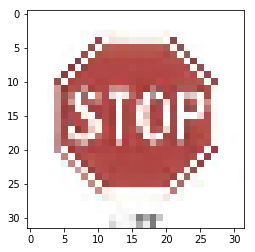

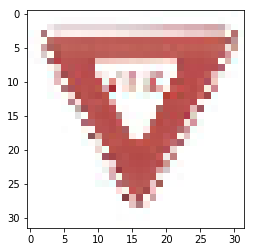

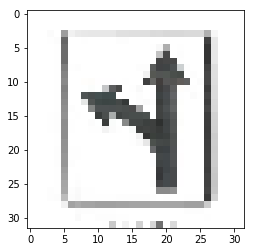

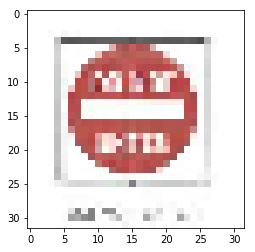

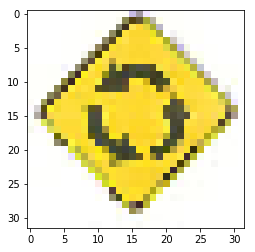

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image


# Visualizations will be shown in the notebook.
%matplotlib inline

sample_labels = np.array([37, # left_or_through.jpg -> go straight or left
                          40, # circular_intersection_ahead.jpg -> Roundabout mandatory
                          13, # yield.ppm -> yield
                          27, # ped_crossing.jpg -> pedestrians
                          31, # deer_crossing.jpg -> Wild animals crossing
                          35, # straight_ahead_only.jpg -> Ahead only
                          17, # do_not_enter.jpg -> entry
                          14  # stop.jpg -> stop
                         ])

def get_usa_images(count, path):
    images = []
    out_images = []
    out_labels = []
    files =  os.listdir(path)
    
    for file_index in range(len(files)):
        print("file {}: {}".format(file_index, str(files[file_index])))
        image = Image.open(path+"/"+files[file_index])
        image = image.copy()
        image = image.crop((0,0,100,100))
        image = image.resize((32, 32))
        image = np.array(image.getdata()).reshape(image.size[0], image.size[1], 3)
        images.append(image)
    
    random_indexes = random.sample(range(len(sample_labels)), count)
    print("random_indexes: {}".format(random_indexes))
    
    for i in random_indexes:
        out_images.append(images[i])
        out_labels.append(sample_labels[i])

    return np.asarray(out_images, dtype=np.uint8), np.asarray(out_labels, dtype=np.uint8)

def plot_images(usa_images):
    
    for image in usa_images:
        plt.figure()
        plt.imshow(image)
        plt.show()
    

path='usa-traffic-signs-ppm'
usa_images, usa_labels  = get_usa_images(5, path)
print("Shape of input data: images {}, labels {}".format(usa_images.shape, usa_labels.shape))
print("Selected labels: {}".format(usa_labels))
plot_images(usa_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
- Downloaded some US traffic signs from [Here](http://mutcd.fhwa.dot.gov/services/publications/fhwaop02084/)
- Since these images were not size 32x32. All of these images had a white space with the traffic sign description at the bottom, so the images were cropped and scaled accordingly.
- These images are for USA traffic signs. The model was trained against German traffic signs and therefore, I'm not expecting the model to perform well at all.
- The 5 test images against which the model will be evaluated are plotted above

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(usa_images, usa_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.400


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
- As it's seen from the code above: 
    - Came up with 8 US traffic signs that matched the German signs
    - Created labels for these images
    - Selected 5 images for testing at random and selected the labels that applied to them 
- Ran the same evaluation as for the other test data and got 40% accuracy

In [21]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
top_k = tf.placeholder(tf.int32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, 3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = sess.run(top_k, feed_dict={x: usa_images, y: usa_labels})
    print(output)


Shape of x:
(?, 32, 32, 3)
Shape after conv1:
<bound method Tensor.get_shape of <tf.Tensor 'BiasAdd_4:0' shape=(?, 28, 28, 6) dtype=float32>>
TopKV2(values=array([[  1.00000000e+00,   1.45766663e-11,   2.47929487e-15],
       [  1.00000000e+00,   4.42789014e-14,   1.90018831e-14],
       [  9.59519267e-01,   3.82654965e-02,   1.65634137e-03],
       [  7.49310970e-01,   2.34051615e-01,   1.02685653e-02],
       [  9.90704358e-01,   3.43146082e-03,   2.27587880e-03]], dtype=float32), indices=array([[14, 13,  1],
       [13,  1,  2],
       [ 4,  1, 21],
       [26, 14,  1],
       [14, 28, 13]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
- I have selected k = 3 and for 5 images, here are the results:
    1. **Stop:** Label Index 14 has highest reported probability and it's a correct prediction.
    2. **Yield sign:** Label Index 13 has highest reported probability and it's a correct prediction.
    3. **Straight ahead only:** Label Index 37 was expected. However, no labels in the top 3 probability have resemblance with the sign. Model predicted that this sign is for speed limit 70. Shape of 7 has similar features to the straight and left sign. So, the prediction kind of makes sense, however, incorrect
    4. **Do not enter:** The label expected for this sign was 17. But top 3 predictions were 26, 14 and 1. Stop sign and do not enter signs are very similar. Label 14 is for stop sign. So, model was close, but not correct again.
    5. **Circular Intersetion:** The label expected for this sign was 40. Top 3 predicted by model were 14, 28 and 13. These labels are associated with Stop, Children crossing and Yield respectively. Model correctly matched the circular feature of Stop and Roundabout but failed in general to accurately predict roundabout. The factors that deviated between the German and US sign are: shape of the sign board, background color etc.
    
    
Overall, model gave 40% accuracy in predicting the usa traffic signs after being trained with data for German traffic signs    

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.